#### Projeto de Machine Learning

In [1]:
# Importação da biblioteca
import pandas as pd

In [2]:
# Base de dados
df = pd.read_csv('./data/survey_lung_cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
# Verificando o tamanho
df.shape

(309, 16)

In [4]:
# Visualizando o as informação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
# Contamos valores NAN 
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
# genero, falta de padronização e NAs
agrupag = df.groupby(['GENDER']).size()
agrupag

GENDER
F    147
M    162
dtype: int64

In [7]:
# idade
df['AGE'].describe()

count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

In [8]:
# dados duplicados
df.duplicated().sum()

33

In [9]:
# Excluído
df.drop_duplicates(keep='first', inplace=True)

In [10]:
#buscamos duplicados
df.duplicated().sum()

0

In [11]:
df.shape

(276, 16)

Usando Algoritmo Random Forest

In [12]:
## Importação das bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Criando os previsores e a classe
previsores = df.iloc[:,0:14].values
classe = df.iloc[:,15].values

In [14]:
# Transformação dos atributos categóricos em atributos numéricos
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])

In [15]:
# Divisão da base de dados entre treinamento e teste 
# (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    previsores, classe, test_size = 0.3, random_state = 0
)

In [16]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [17]:
# Fazendo a previsões
previsoes = floresta.predict(X_teste)
previsoes

array(['NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES'], dtype=object)

In [18]:
# Matrix de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 8,  3],
       [ 6, 66]], dtype=int64)

In [19]:
# Visualizando a taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.891566265060241

Usando a Árvores de decisão

In [20]:
# Importação da biblioteca
from sklearn.tree import DecisionTreeClassifier

In [21]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [22]:
# Obtenção das previsões
previsoes = arvore.predict(X_teste)
previsoes

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES'],
      dtype=object)

In [23]:
#matriz de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 5,  6],
       [ 6, 66]], dtype=int64)

In [24]:
#taxa acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.8554216867469879

In [25]:
#taxa erro
taxa_erro = 1 - taxa_acerto
taxa_erro

0.14457831325301207

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

In [28]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array(['NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES'], dtype='<U3')

In [29]:
from yellowbrick.classifier import ConfusionMatrix 

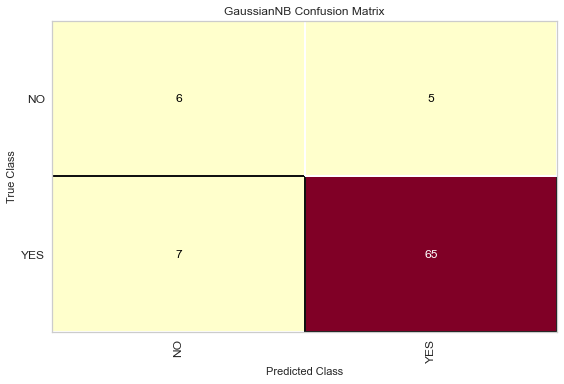

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [30]:
# Visualização da matriz de confusão
# Warning interno da biblioteca yellowbrick, já esta na última versão
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [31]:
# visualizando a taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.8554216867469879